In [7]:
require("immunarch")

In [49]:
config = yaml::read_yaml("/data/sources/immune-repertoires-dash/config.yml")

samples = names(config$samples)
# samples = c('S5205Nr1-N2_IgG1Fc_H', 'S5205Nr1-P1_IgG1Fc_H', 'S5205Nr1-P2_IgG1Fc_H')

Warning message in readLines(file):
“incomplete final line found on '/data/sources/immune-repertoires-dash/config.yml'”


In [50]:
paths = c()

for (sample in samples) {
    rep_path = paste0(
        config$samples[[sample]]$sample_path,
        "/clones/",
        sample,
        "_novj_with_clones.tsv"
    )
    paths = c(paths, rep_path)
}

print(paths)

 [1] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv"
 [2] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv"
 [3] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-RAMOS_heavy/clones/S3987Nr1-RAMOS_heavy_novj_with_clones.tsv"
 [4] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-RAMOS_light/clones/S3987Nr1-RAMOS_light_novj_with_clones.tsv"
 [5] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv"
 [6] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv"
 [7] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-RAMOS_heavy/clones/S3987Nr2-RAMOS_heavy_novj_with_clones.tsv"
 [8] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-RAMOS_light/clones/S3987Nr2-RAMOS_light_novj_with_clones.tsv"
 [9] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-N2_IgG1Fc_H/clones/S5205Nr1-N2_IgG1F

In [51]:
repertoires = repLoad(.path = paths)


== Step 1/3: loading repertoire files... ==


Processing "<initial>" ...

  -- [1/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [2/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [3/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-RAMOS_heavy/clones/S3987Nr1-RAMOS_heavy_novj_with_clones.tsv" -- 
airr

  -- [4/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-RAMOS_light/clones/S3987Nr1-RAMOS_light_novj_with_clones.tsv" -- 
airr

  -- [5/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [6/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [7/13] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-RAMOS_heavy/clones/S3987

Exploratory analysis

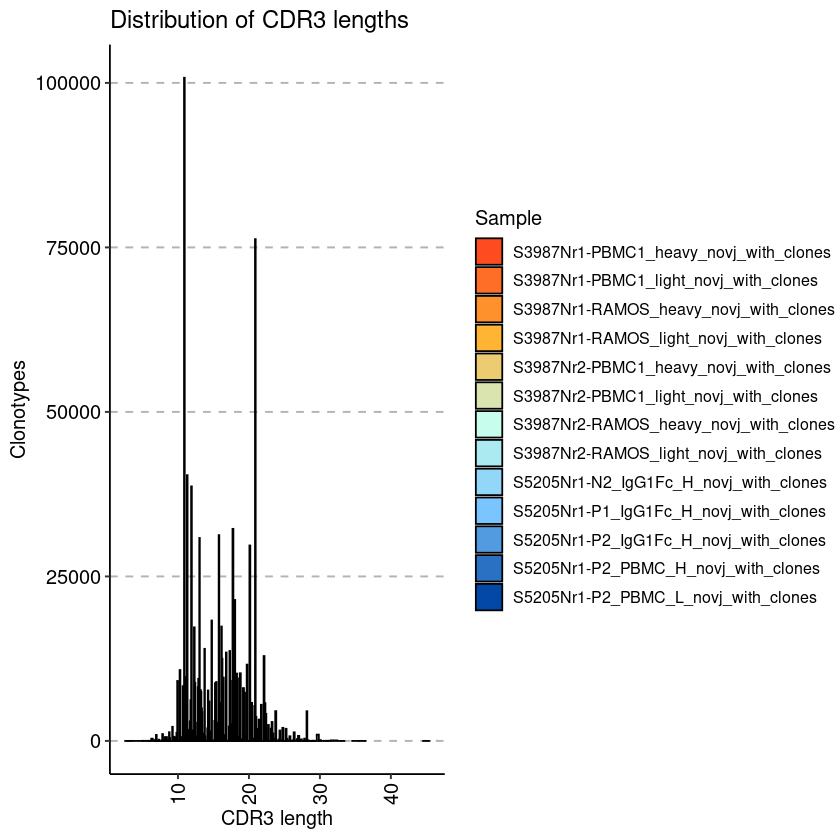

In [52]:
explorer_vol = repExplore(repertoires$data, .method = "volume")
explorer_len = repExplore(repertoires$data, .method = "len", .col = "aa")
explorer_cnt = repExplore(repertoires$data, .method = "count")

p1 = vis(explorer_vol)
p2 = vis(explorer_len)
p3 = vis(explorer_cnt)

p2

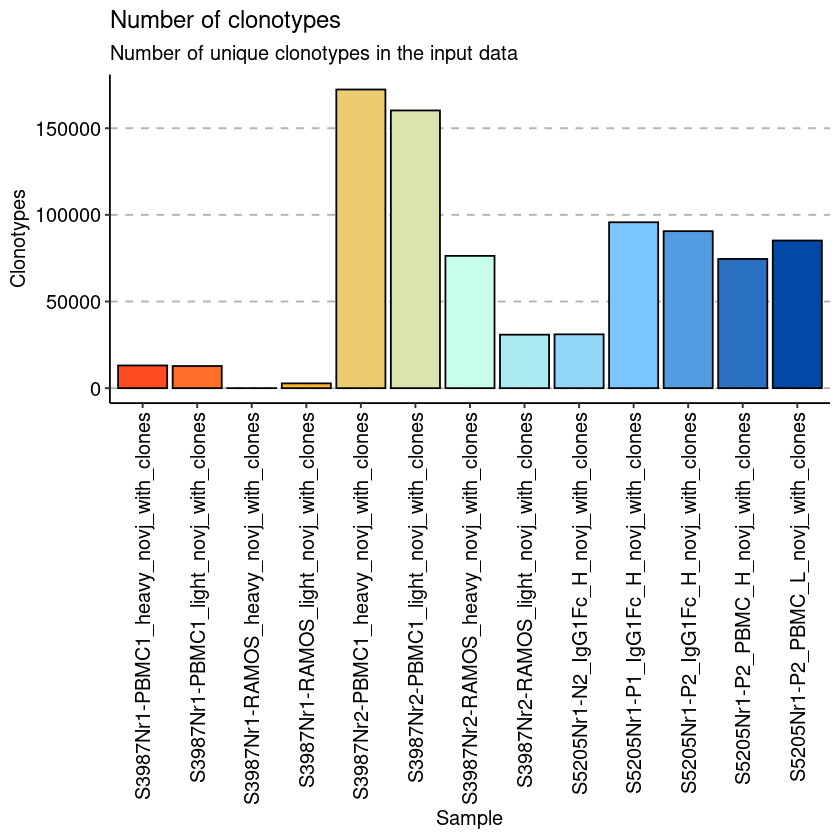

In [53]:
p1

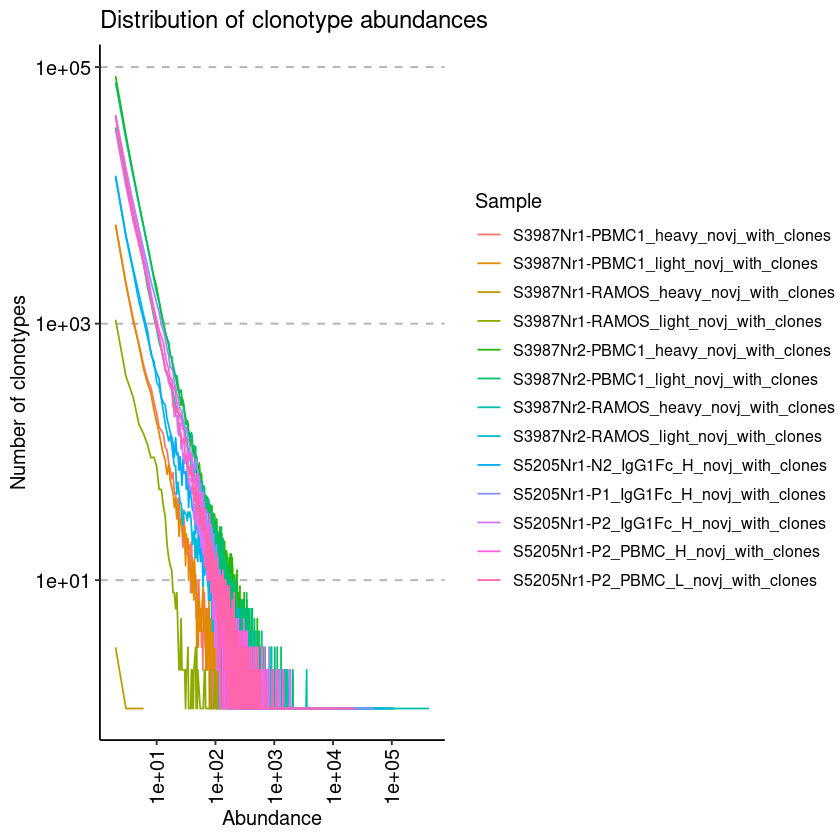

In [54]:
p3

Clonality

In [55]:
imm_pr <- repClonality(
    repertoires$data, 
    .method = "clonal.prop"
)
imm_top <- repClonality(
    repertoires$data, 
    .method = "top", 
    .head = c(10, 100, 1000, 3000, 10000)
)
imm_rare <- repClonality(
    repertoires$data, 
    .method = "rare"
)
imm_hom <- repClonality(
    repertoires$data,
    .method = "homeo",
    .clone.types = c(
        Small = .0001, 
        Medium = .001, 
        Large = .01, 
        Hyperexpanded = 1
    )
)

Using Sample as id variables



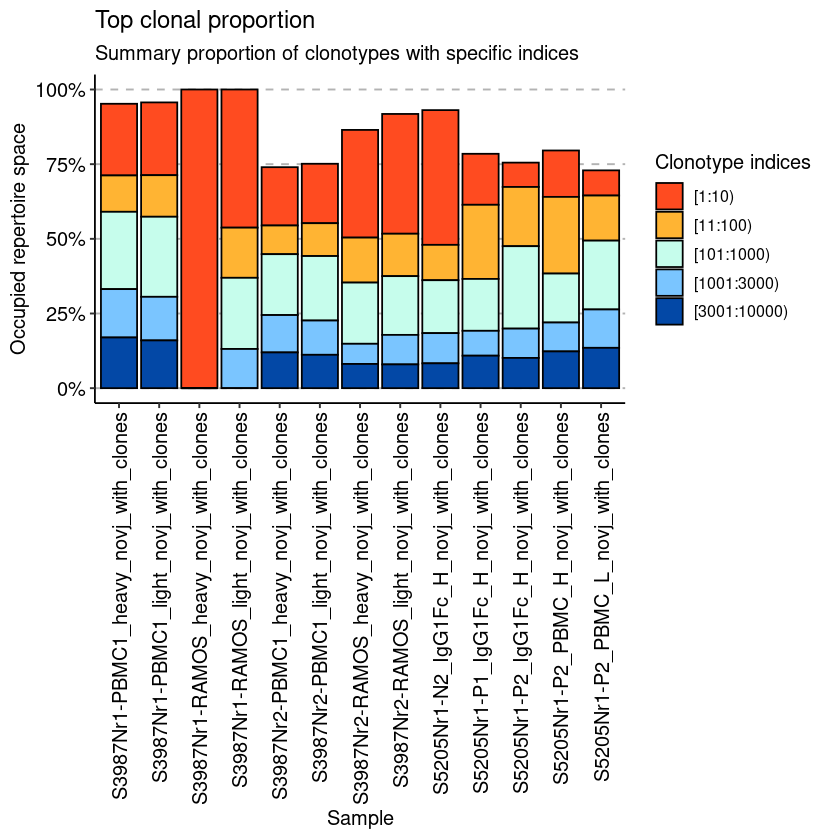

In [56]:
vis(imm_top)# + vis(imm_top, .by = "Status", .meta = immdata$meta)

Using Sample as id variables



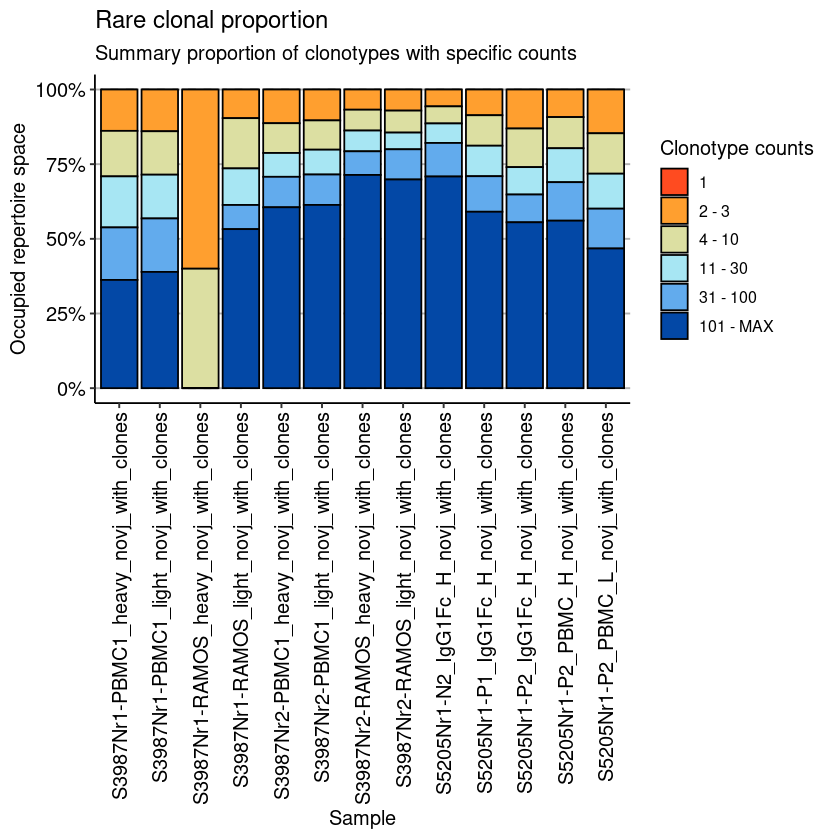

In [57]:
vis(imm_rare)# + vis(imm_rare, .by = "Status", .meta = immdata$meta)

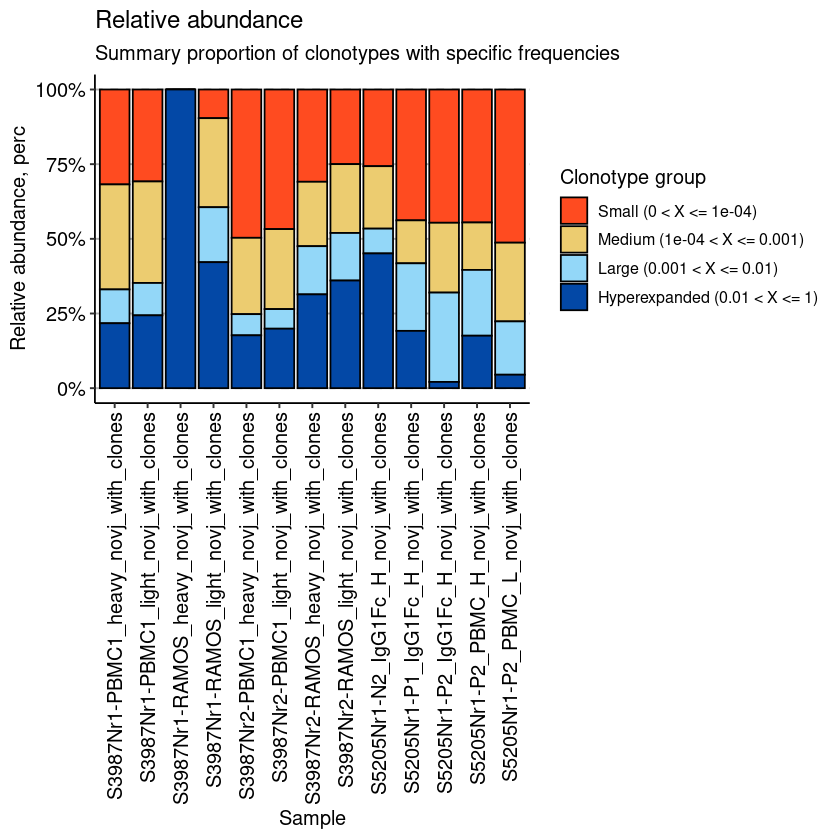

In [58]:
vis(imm_hom)# + vis(imm_hom, .by = c("Status", "Sex"), .meta = immdata$meta)

Repertoire overlaps and public repertoires

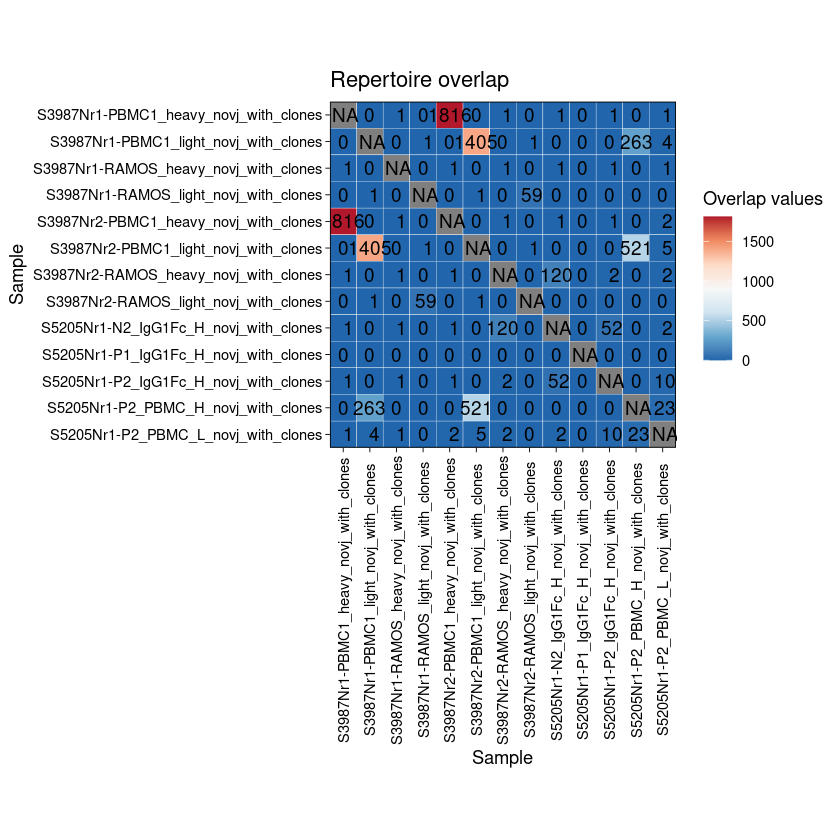

In [61]:
imm_ov1 <- repOverlap(repertoires$data, .method = "public", .verbose = F)
p1 <- vis(imm_ov1)

p1